# Graphiques animés

Dans cette partie, nous allons apprendre les commandes de base de `matplotlib` pour animer les graphiques. Notez bien que ce n'est pas forcément le plus simple dans les `jupyter-notebooks` à cause du choix du backend.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['savefig.dpi'] = 80
plt.rcParams['figure.dpi'] = 60
%matplotlib notebook

UPS_primary = (0.38823529411764707, 0.0, 0.23529411764705882)
UPS_bleu = (0.0, 0.3058823529411765, 0.49019607843137253)
UPS_orange = (0.9333333333333333, 0.20392156862745098, 0.13725490196078433)
UPS_vert = (0.0, 0.5019607843137255, 0.47843137254901963)


## Animation

Il est possible de faire des animations, c'est-à-dire d'afficher un graphique avec des données qui sont modifiées au cours du temps (par exemple par un code qui retourne une solution à l'instant $t$).

In [2]:
from matplotlib.animation import FuncAnimation

help(FuncAnimation)

Help on class FuncAnimation in module matplotlib.animation:

class FuncAnimation(TimedAnimation)
 |  FuncAnimation(fig, func, frames=None, init_func=None, fargs=None, save_count=None, *, cache_frame_data=True, **kwargs)
 |  
 |  `TimedAnimation` subclass that makes an animation by repeatedly calling
 |  a function *func*.
 |  
 |  .. note::
 |  
 |      You must store the created Animation in a variable that lives as long
 |      as the animation should run. Otherwise, the Animation object will be
 |      garbage-collected and the animation stops.
 |  
 |  Parameters
 |  ----------
 |  fig : `~matplotlib.figure.Figure`
 |      The figure object used to get needed events, such as draw or resize.
 |  
 |  func : callable
 |      The function to call at each frame.  The first argument will
 |      be the next value in *frames*.   Any additional positional
 |      arguments can be supplied using `functools.partial` or via the *fargs*
 |      parameter.
 |  
 |      The required signature i

<IPython.core.display.Javascript object>


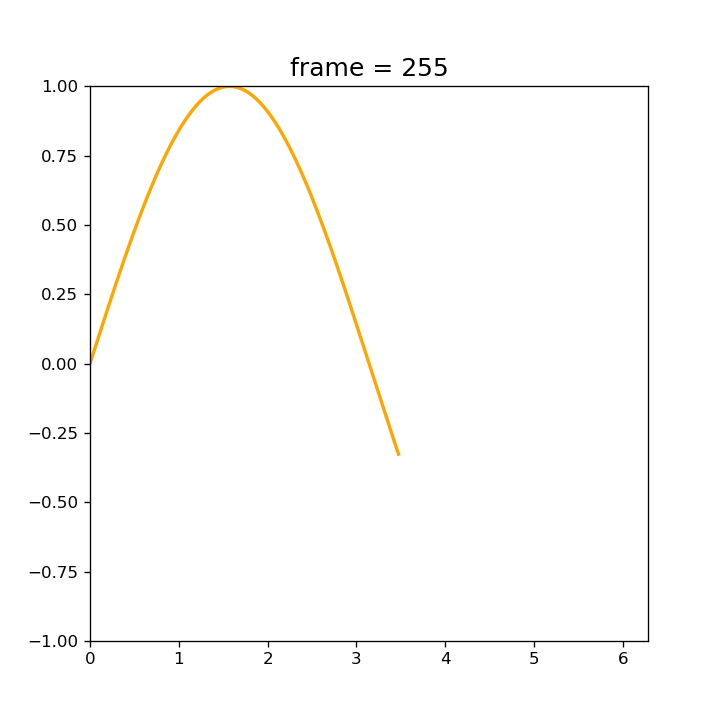

In [3]:
fig = plt.figure(figsize=(6, 6))
fig.clf()

ax = fig.add_subplot(1, 1, 1)
xdata = np.linspace(0, 2*np.pi, 256)
ydata = np.sin(xdata)
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1, 1)
ln = ax.plot([], [], linewidth=2, color='orange')[0]
ax.set_title("frame = 0", fontsize=15)

def update(frame):
    ln.set_data(xdata[:frame], ydata[:frame])
    ax.set_title(f"frame = {frame}", fontsize=15)
    return ln

ani = FuncAnimation(
    fig, update,
    blit=False, interval=20,
    frames=xdata.size
)
ani.save("05_2_anim1.gif")

:::{image} 05_2_anim1.gif
:alt: ipywidget
:class: bg-primary mb-1
:width: 50%
:align: center
:::

In [13]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets as widgets

mpl.rcParams['savefig.dpi'] = 80
plt.rcParams['figure.dpi'] = 60
%matplotlib notebook

UPS_primary = (0.38823529411764707, 0.0, 0.23529411764705882)
UPS_bleu = (0.0, 0.3058823529411765, 0.49019607843137253)
UPS_orange = (0.9333333333333333, 0.20392156862745098, 0.13725490196078433)
UPS_vert = (0.0, 0.5019607843137255, 0.47843137254901963)

UPS_colors = {
    'UPS': UPS_primary,
    'bleu': UPS_bleu,
    'orange': UPS_orange,
    'vert': UPS_vert
}

<IPython.core.display.Javascript object>


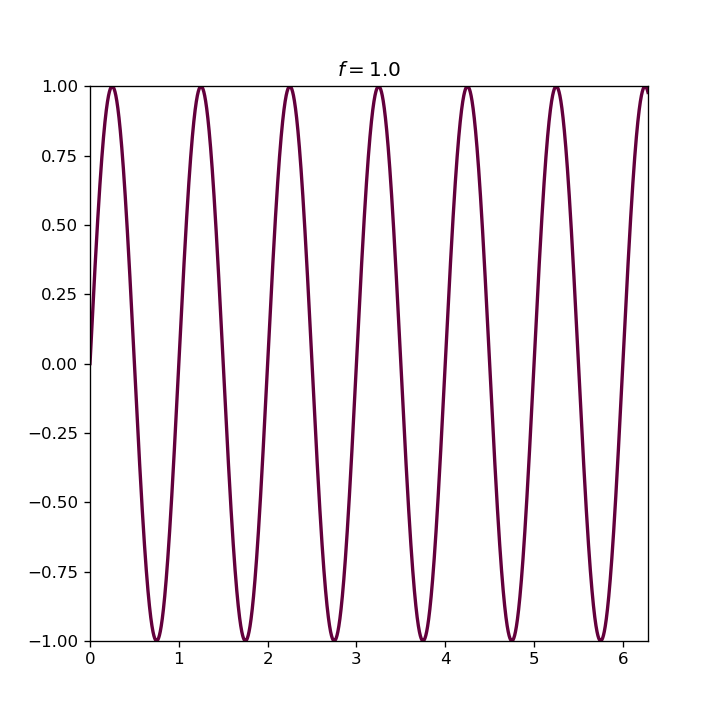

interactive(children=(FloatSlider(value=1.0, description='fréquence', max=2.0, step=0.01), Dropdown(descriptio…

In [14]:
def phi(t, f):
    return np.sin(2*np.pi*f*t)

t= np.linspace(0, 2*np.pi, 10000)
f = 1
fig = plt.figure(figsize=(6, 6))
ax2 = fig.add_subplot(1, 1, 1)
line, = ax2.plot([], [], color='orange', linewidth=2)
ax2.set_title(f"$f={f}$")
ax2.set_xlim(0, 2*np.pi)
ax2.set_ylim(-1, 1)
color_names = list(UPS_colors.keys())

def update(f, color):
    line.set_data(t, phi(t, f))
    line.set_color(UPS_colors[color])
    ax2.set_title(f"$f={f}$")
    plt.show()

widgets.interact(
    update,
    f=widgets.FloatSlider(
        value=1,
        min=0, max=2, step=.01,
        continuous_update=True,
        description='fréquence',
    ),
    color=widgets.Dropdown(
        options=color_names,
        value=color_names[0],
        description="couleur"
    )
)
plt.show()

:::{image} 05_2_anim2.gif
:alt: ipywidget
:class: bg-primary mb-1
:width: 50%
:align: center
:::